## Things to be done: 
1) Check for outliers in the data, esp the in view column 

2) Test which is the best way to normalise the target variable, [View/Subs] , [View/(Subs*numDays)] , [View/(Subs*numDays+1)] , [View/(Subs*log(numDays+1))] 

3) Check if features like exclaimCount/Hashtag has more views in one category than the other (Perhaps some form of a statistical test)

4) IF EDA can result is more features being generated that would be SUPER useful

## KEY OBSERVATIONS AFTER EDA
After removing outliers in views (using quartile min max method),
1. Seems like DaysPosted not correlated to Views 
2. But if we normalise just using subscribers, target variable is not correlated to views at all, not sure if this is an issue

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Brief look into the dataset
data = pd.read_excel('ProcessedData.xlsx')
data = data.drop(columns=['Unnamed: 0'])
data.head()

In [ ]:
# Check general information of data 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9441 entries, 0 to 9440
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Checked             9441 non-null   int64         
 1   Channel Name        9441 non-null   object        
 2   title               9441 non-null   object        
 3   date                9441 non-null   datetime64[ns]
 4   thumbnailUrl        9441 non-null   object        
 5   Views               9441 non-null   int64         
 6   Description         9318 non-null   object        
 7   Duration            9441 non-null   object        
 8   Like                9441 non-null   int64         
 9   Subscribers         9441 non-null   int64         
 10  title_lemmatized    9441 non-null   object        
 11  HasHashtag          9441 non-null   int64         
 12  HashtagCount        9441 non-null   int64         
 13  ExclamationCount    9441 non-null   int64       

In [ ]:
# Check for missing values 
data.isnull().sum()

Checked                  0
Channel Name             0
title                    0
date                     0
thumbnailUrl             0
Views                    0
Description            123
Duration                 0
Like                     0
Subscribers              0
title_lemmatized         0
HasHashtag               0
HashtagCount             0
ExclamationCount         0
QuestionCount            0
NumWords                 0
HasCaps                  0
DaysPosted               0
Total Seconds            0
Total Seconds bins       0
emojis                8053
target                   0
Language                 0
dtype: int64

The variable "Description" is ignored as its not within the scope of our project. 
We will look into "emojis" in greater detail later.

In [ ]:
# data['logDaysPosted'] = data['DaysPosted'].apply(lambda x: math.log(x) if x>0 else x) 
# data['target2'] = data['Views']/(data['Subscribers']*data['logDaysPosted'])

# not very useful

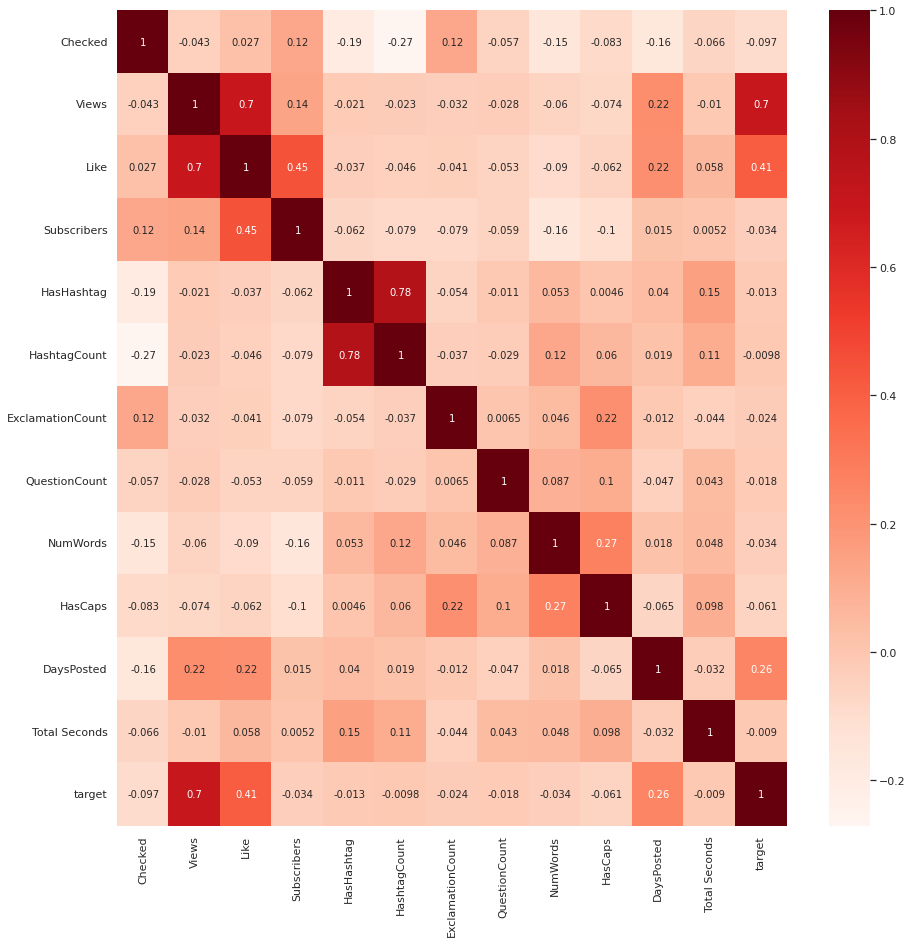

In [ ]:
# See initial correlation between the various variables
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds')

## Identifying Best Approach in Normalising Target Variable

Text(0, 0.5, 'Views')

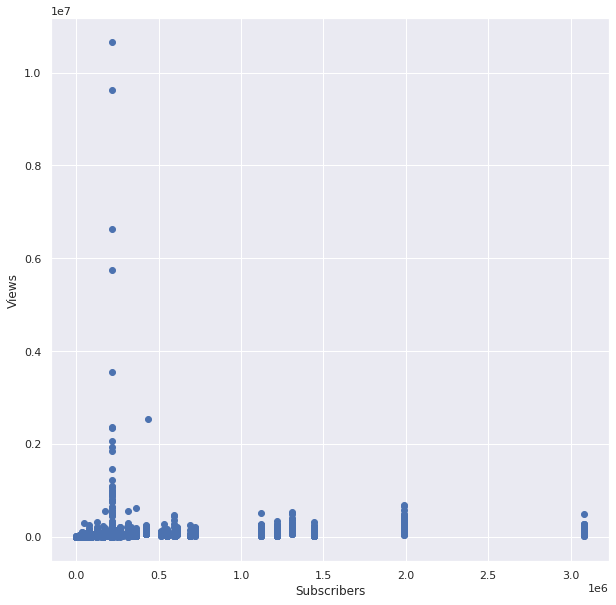

In [ ]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data)
plt.xlabel("Subscribers")
plt.ylabel('Views')

Strong outliers observed for views and subscribers, to be removed. 

In [ ]:
# Remove outliers in Views and Days Posted 
# def remove_outlier_IQR(df, column):
#     Q1=df[column].quantile(0.25)
#     Q3=df[column].quantile(0.75)
#     IQR=Q3-Q1
#     df_final=df[~((df[column]<(Q1-1.5*IQR)) | (df[column]>(Q3+1.5*IQR)))]
#     return df_final

In [ ]:
def remove_outlier(df, column):
    bot1=df[column].quantile(0.01)
    top1=df[column].quantile(0.99)
    df_final=df[~((df[column]<bot1) | (df[column]>top1))]
    return df_final

In [ ]:
data_remove = remove_outlier(data, 'Views')
data_remove = remove_outlier(data_remove, 'Subscribers')

Text(0, 0.5, 'Views')

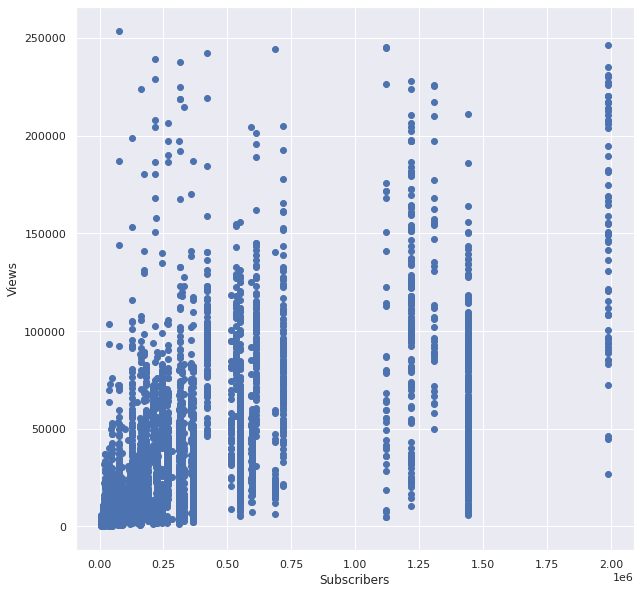

In [ ]:
# Check relationship between Views and Subscribers
plt.figure(figsize=(10,10))
plt.scatter(x='Subscribers', y='Views', data=data_remove)
plt.xlabel("Subscribers")
plt.ylabel('Views')

In [ ]:
# data_remove['Target'] = data_remove['Views']/(data_remove['Subscribers'])
# data_remove.head()

Text(0.5, 1.0, 'After Removing Outliers')

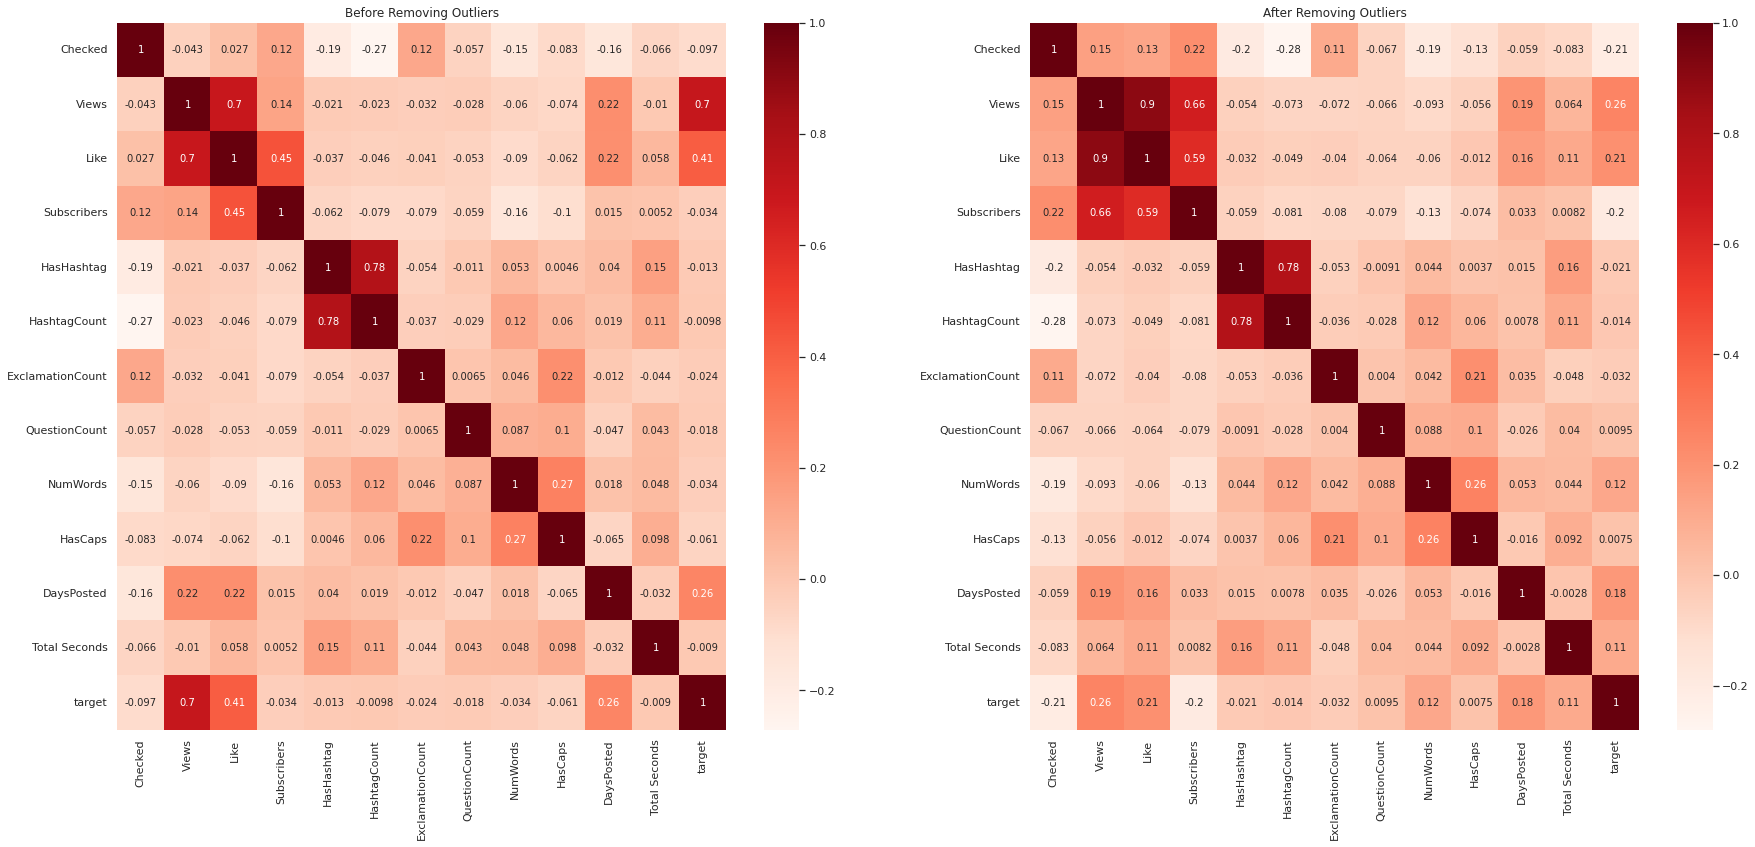

In [ ]:
# See correlation between the various variables after removing outliers in views and subscribers
fig, axes = plt.subplots(1, 2, figsize=(30,13))

sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[0])
axes[0].set_title('Before Removing Outliers')

sns.heatmap(data_remove.corr(), cbar=True, annot=True, cmap='Reds', ax=axes[1])
axes[1].set_title('After Removing Outliers')

We will normalise views with subscribers count. 

In [ ]:
# Correlation between Views and target variable 
data_remove['Views'].corr(data_remove['target'])

0.2587289388587801

In [ ]:
# Correlation between Subscribers and target variable 
data_remove['Subscribers'].corr(data_remove['target'])

-0.1961166834905912